<a href="https://colab.research.google.com/github/Satnam812/Project-Regression-on-synthetic-data-/blob/main/capital_one_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df_test = pd.read_csv("/content/codetest_test.txt",delimiter='\t')
df_train = pd.read_csv("/content/codetest_train.txt",delimiter='\t')

In [ ]:
df_test.head()

,f_0,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,f_9,...,f_244,f_245,f_246,f_247,f_248,f_249,f_250,f_251,f_252,f_253
0,1.122,2.372,-1.303,-0.421,-1.724,0.206,0.449,1.305,-0.344,0.307,...,0.988,-0.472,0.522,-0.308,1.062,-0.839,0.819,0.342,-0.162,-1.123
1,0.645,-0.818,-1.193,0.286,0.946,2.001,-1.491,-0.162,-1.668,0.310,...,-0.020,0.764,-0.623,0.147,0.392,0.509,1.608,-0.321,-1.723,1.223
2,-0.661,0.373,1.160,0.448,NaN,-0.378,-0.645,0.713,1.900,0.627,...,0.156,-0.267,0.140,-0.908,0.093,0.227,-0.996,-0.665,0.444,-1.452
3,0.837,1.270,-1.421,-0.483,1.136,0.051,-0.097,NaN,-1.524,-0.253,...,1.653,1.951,0.657,-1.238,-0.487,-1.341,1.221,1.938,-0.447,0.411
4,-0.001,-0.050,0.442,0.230,0.525,0.326,-0.590,-0.287,-0.556,-0.088,...,-0.291,-0.196,-0.738,-0.377,-0.660,1.776,-1.028,-0.797,0.185,0.378


In [ ]:
df_train.head()

,target,f_0,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,...,f_244,f_245,f_246,f_247,f_248,f_249,f_250,f_251,f_252,f_253
0,3.066056,-0.653,0.255,-0.615,-1.833,-0.736,NaN,1.115,-0.171,-0.351,...,-1.607,-1.400,-0.920,-0.198,-0.945,-0.573,0.170,-0.418,-1.244,-0.503
1,-1.910473,1.179,-0.093,-0.556,0.811,-0.468,-0.005,-0.116,-1.243,1.985,...,1.282,0.032,-0.061,NaN,-0.061,-0.302,1.281,-0.850,0.821,-0.260
2,7.830711,0.181,-0.778,-0.919,0.113,0.887,-0.762,1.872,-1.709,0.135,...,-0.237,-0.660,1.073,-0.193,0.570,-0.267,1.435,1.332,-1.147,2.580
3,-2.180862,0.745,-0.245,-1.343,1.163,-0.169,-0.151,-1.100,0.225,1.223,...,0.709,-0.203,-0.136,-0.571,1.682,0.243,-0.381,0.613,1.033,0.400
4,5.462784,1.217,-1.324,-0.958,0.448,-2.873,-0.856,0.603,0.763,0.020,...,0.892,-0.433,-0.877,0.289,0.654,1.230,0.457,-0.754,-0.025,-0.931


In [ ]:
df_train.describe()

,target,f_0,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,...,f_244,f_245,f_246,f_247,f_248,f_249,f_250,f_251,f_252,f_253
count,5000.000000,4903.000000,4928.000000,4908.000000,4910.000000,4907.000000,4912.000000,4897.000000,4904.000000,4893.000000,...,4910.000000,4883.000000,4914.000000,4894.000000,4902.000000,4886.000000,4900.000000,4921.000000,4904.000000,4904.000000
mean,1.143878,-0.000433,0.002564,0.028877,-0.005437,-0.006759,0.005569,0.001536,-0.001019,0.009744,...,0.013529,0.004941,0.023261,-0.018447,-0.009842,0.016958,-0.004947,0.016868,-0.001351,0.010334
std,5.259896,0.999739,0.997930,1.019337,0.990351,1.006293,0.995799,1.004624,0.997356,0.988310,...,1.001453,0.997330,0.996458,1.005000,0.989228,1.011331,0.991577,1.001358,1.003411,1.006896
min,-26.705570,-3.941000,-3.847000,-3.818000,-3.434000,-3.400000,-4.051000,-3.179000,-3.890000,-3.857000,...,-3.585000,-3.494000,-3.485000,-4.012000,-3.252000,-3.821000,-3.376000,-3.373000,-3.950000,-3.728000
25%,-2.034383,-0.673000,-0.685000,-0.651000,-0.655000,-0.685500,-0.660000,-0.672000,-0.679000,-0.662000,...,-0.665750,-0.676000,-0.661750,-0.692000,-0.663000,-0.647750,-0.679500,-0.647000,-0.695000,-0.677000
50%,1.166835,-0.011000,-0.003000,0.047500,0.003500,-0.007000,-0.008000,-0.003000,-0.021500,0.017000,...,0.026000,-0.028000,0.027000,-0.035000,-0.010500,0.002500,0.010000,0.020000,0.002500,0.015000
75%,4.439549,0.677000,0.674500,0.719000,0.668000,0.654000,0.649000,0.679000,0.670250,0.698000,...,0.671750,0.670000,0.702500,0.655000,0.651000,0.709750,0.660250,0.692000,0.672250,0.705250
max,26.347818,3.831000,3.996000,3.199000,4.962000,3.106000,4.296000,4.166000,3.798000,4.195000,...,3.365000,3.456000,3.881000,3.690000,3.629000,4.144000,3.873000,3.187000,3.724000,3.956000


In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Columns: 255 entries, target to f_253
dtypes: float64(251), object(4)
memory usage: 9.7+ MB


In [ ]:
null_cols = df_train.isna().sum()


In [ ]:
null_test = df_test.isna().sum()

In [ ]:
null_test

,0
f_0,28
f_1,17
f_2,17
f_3,18
f_4,22
...,...
f_249,20
f_250,19
f_251,22
f_252,21


***I am imputing missing numerical values by replacing them with the median.***

In [ ]:
for i in null_cols.index:
  if (null_cols[i] > 0 )& (df_train[i].dtype != "object"):
    df_train[i].fillna(df_train[i].median(),inplace = True)

<ipython-input-50-44844eba0d28>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train[i].fillna(df_train[i].median(),inplace = True)


In [ ]:
for i in null_test.index:
  if (null_test[i] > 0 )& (df_test[i].dtype != "object"):
    df_test[i].fillna(df_test[i].median(),inplace = True)

<ipython-input-51-548be34bb41b>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_test[i].fillna(df_test[i].median(),inplace = True)


In [ ]:
null_cols

,0
target,0
f_0,97
f_1,72
f_2,92
f_3,90
...,...
f_249,114
f_250,100
f_251,79
f_252,96


In [ ]:
null_test

,0
f_0,28
f_1,17
f_2,17
f_3,18
f_4,22
...,...
f_249,20
f_250,19
f_251,22
f_252,21


creating a list of categorical columns only

In [ ]:
categorical_columns = list()
for col in df_train.columns:
  if df_train[col].dtypes == "object":
    categorical_columns.append(col)

In [ ]:
categorical_columns

['f_61', 'f_121', 'f_215', 'f_237']

In [ ]:
for i in categorical_columns:
  print(df_train[i].isna().sum())


95
86
102
95


In [ ]:
pd.concat([df_train["f_61"],df_train["f_121"],df_train["f_215"],df_train["f_237"]],axis = 1) #dtypes are correct for all these columns

,f_61,f_121,f_215,f_237
0,b,D,red,Canada
1,a,A,blue,Canada
2,b,B,orange,Canada
3,a,C,blue,USA
4,b,E,orange,Canada
...,...,...,...,...
4995,e,B,blue,Canada
4996,c,F,red,Canada
4997,d,F,yellow,Mexico
4998,d,C,blue,USA


In [ ]:
pd.concat([df_test["f_61"],df_test["f_121"],df_test["f_215"],df_test["f_237"]],axis = 1)

,f_61,f_121,f_215,f_237
0,e,A,yellow,Mexico
1,d,B,red,Canada
2,d,C,NaN,Mexico
3,e,E,blue,USA
4,b,C,NaN,Mexico
...,...,...,...,...
995,b,B,yellow,USA
996,b,B,yellow,Mexico
997,e,D,red,Canada
998,c,B,red,Mexico


filling null values for categorical columns

In [ ]:
for i in categorical_columns:
  df_train[i].fillna(df_train[i].mode()[0],inplace = True)

<ipython-input-59-d374c196ed86>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train[i].fillna(df_train[i].mode()[0],inplace = True)


filling null values of test categorical features

In [ ]:
test_categorical_columns = list()
for col in df_test.columns:
  if df_test[col].dtypes == "object":
    test_categorical_columns.append(col)

for i in test_categorical_columns:
  df_test[i].fillna(df_test[i].mode()[0],inplace = True)


<ipython-input-60-fee4571ab4ef>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_test[i].fillna(df_test[i].mode()[0],inplace = True)


In [ ]:
for i in test_categorical_columns:
  print(df_test[i].isna().sum())

0
0
0
0


***Examining the distribution of the continuous target variable to understand its range and identify any potential skewness or outliers.***

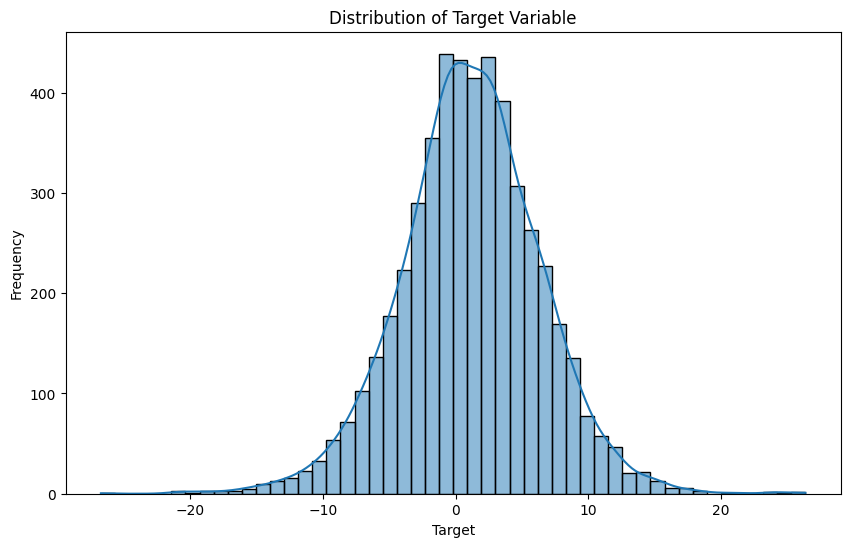

In [ ]:
import seaborn as sns
# Visualizing the distribution of the target variable
plt.figure(figsize=(10, 6))
sns.histplot(df_train['target'], bins=50, kde=True)
plt.title('Distribution of Target Variable')
plt.xlabel('Target')
plt.ylabel('Frequency')
plt.show()

***Converting categorical columns into numerical format, as machine learning algorithms typically require numerical data for processing.***

In [ ]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()

In [ ]:
for i in categorical_columns:
  df_train[i] = LE.fit_transform(df_train[i])

In [ ]:
for i in test_categorical_columns:
  df_test[i] = LE.fit_transform(df_test[i])

In [ ]:
pd.concat([df_train["f_61"],df_train["f_121"],df_train["f_215"],df_train["f_237"]],axis = 1) # encoded categorical columns this concatenation just to check the each categorical column quickly.


,f_61,f_121,f_215,f_237
0,1,3,2,0
1,0,0,0,0
2,1,1,1,0
3,0,2,0,2
4,1,4,1,0
...,...,...,...,...
4995,4,1,0,0
4996,2,5,2,0
4997,3,5,3,1
4998,3,2,0,2


In [ ]:
pd.concat([df_test["f_61"],df_test["f_121"],df_test["f_215"],df_test["f_237"]],axis = 1)

,f_61,f_121,f_215,f_237
0,4,0,3,1
1,3,1,2,0
2,3,2,0,1
3,4,4,0,2
4,1,2,0,1
...,...,...,...,...
995,1,1,3,2
996,1,1,3,1
997,4,3,2,0
998,2,1,2,1


In [ ]:
categorical_columns = list()
for col in df_train.columns:
  if df_train[col].dtypes == "object":
    categorical_columns.append(col)
categorical_columns

[]

In [ ]:
test_categorical_columns = list()
for col in df_test.columns:
  if df_test[col].dtypes == "object":
    test_categorical_columns.append(col)
test_categorical_columns

[]

***Modelling with Linear Regression***


In [ ]:
X = df_train.drop(columns = "target")
y = df_train["target"]

#splitting data for training and validation
from sklearn.model_selection import train_test_split
X_train,X_val,y_train,y_val = train_test_split(X,y,test_size=0.2, random_state=42)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled  = scaler.fit_transform(X_train)
X_val_scaled  = scaler.transform(X_val)

from sklearn.linear_model import LinearRegression

lr = LinearRegression()

model = lr.fit(X_train_scaled,y_train)

y_val_pred = model.predict(X_val_scaled)

from sklearn.metrics import *

MSE = mean_squared_error(y_val,y_val_pred)
MSE


14.016058652234202

model building with **RandomForestRegressor**

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()

rf_model = rf.fit(X_train_scaled,y_train)

rf_y_val_pred = rf_model.predict(X_val_scaled)

In [ ]:
rf_mse = mean_squared_error(y_val,rf_y_val_pred)
rf_mse

12.189764303732124

In [ ]:
import numpy as np

linear_model_rmse = np.sqrt(MSE)
rf_regressor_model_rmse = np.sqrt(rf_mse)

print(f"linear_model_rmse is {round(linear_model_rmse,2)}")
print(f"rf_regressor_model_rmse is {round(rf_regressor_model_rmse,2)}")

linear_model_rmse is 3.74
rf_regressor_model_rmse is 3.49


In [ ]:
all_models = ["linear_model_rmse","rf_regressor_model_rmse"]
all_models_rmse = [linear_model_rmse,rf_regressor_model_rmse]

**Evaluation of the performnce of different models**

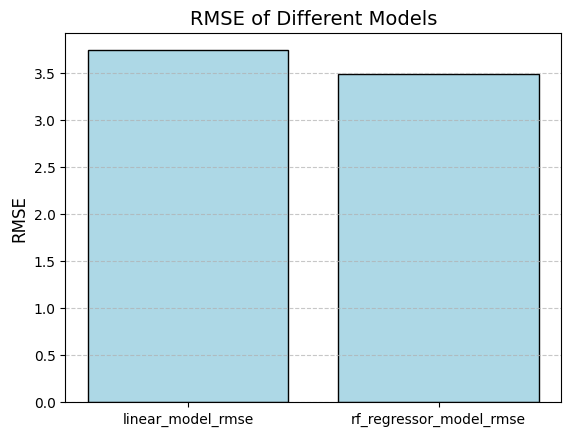

In [ ]:
plt.bar(all_models, all_models_rmse, color='lightblue', edgecolor='black')
plt.title("RMSE of Different Models", fontsize=14)
plt.ylabel("RMSE", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)


plt.show()